IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LOADING DATASET

In [2]:
df=pd.read_csv("CustChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


EXPLORATORY DATA ANALYSIS

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool>

In [10]:
df.duplicated().sum()

0

BASIC DATA CLEANING

In [11]:
df['TotalCharges'].dtype

dtype('O')

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df['TotalCharges'].dtype

dtype('float64')

In [13]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [14]:
df.skew(numeric_only= True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [15]:
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


NUMERIC FEATURE DISTRIBUTION AND SOME PLOTS

In [16]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

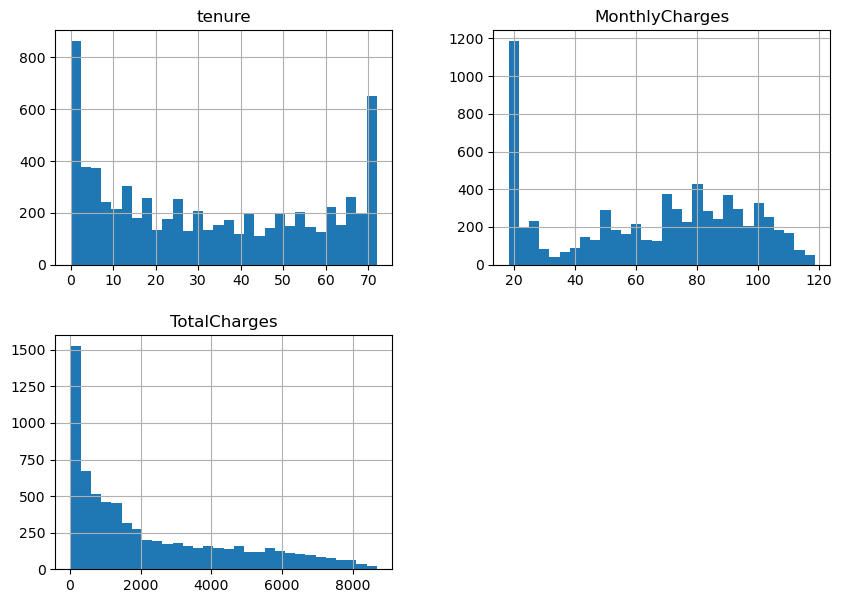

In [17]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

UNDERSTANDING TRENDS

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

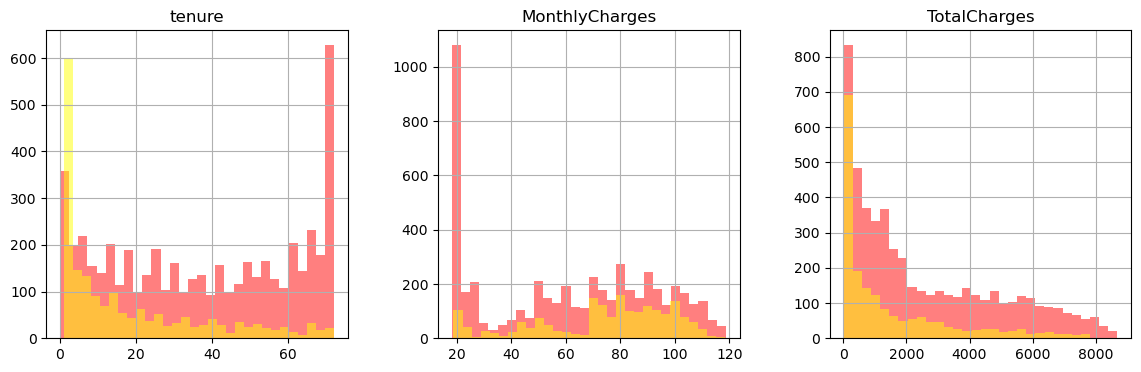

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="yellow", alpha=0.5, ax=ax)

CATEGORY WISE DISTRIBUTION

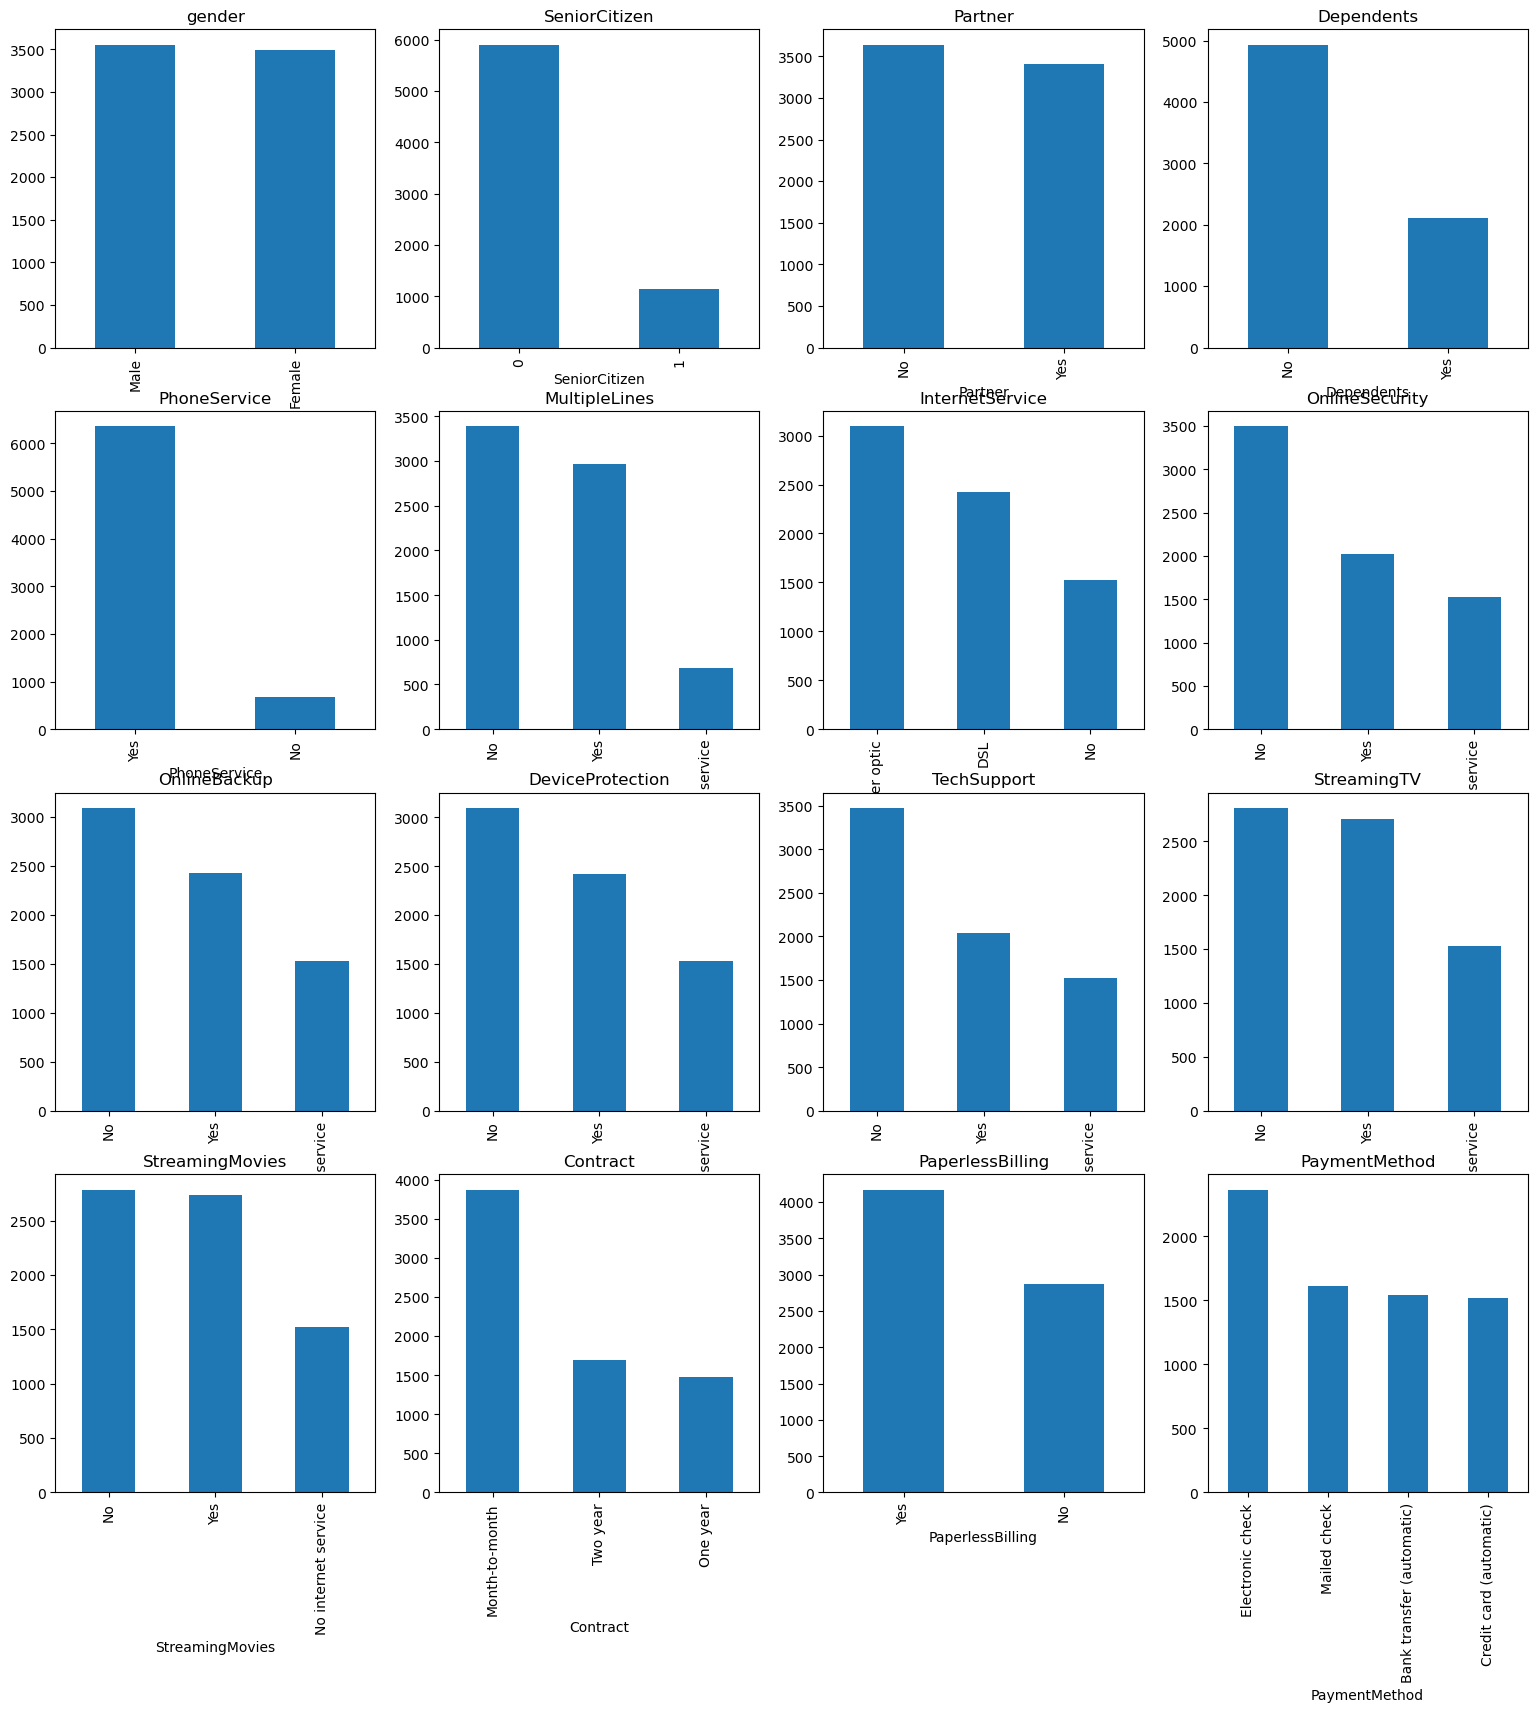

In [19]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

PAIRPLOTS

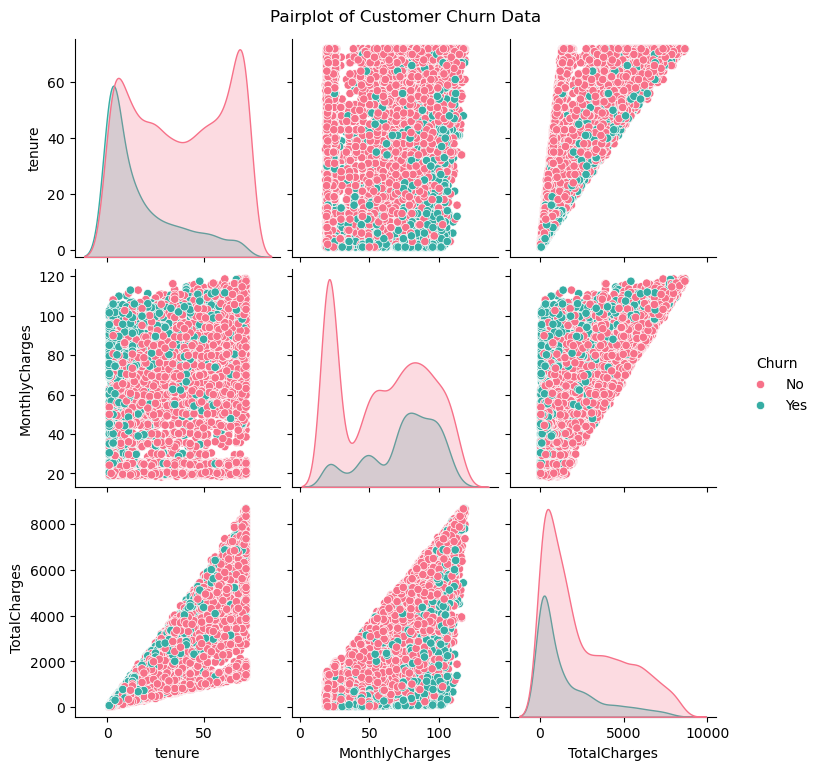

In [54]:
import seaborn as sns

df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
pairplot_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Convert 'TotalCharges' to numeric (sometimes it's read as object)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df_pair = df[pairplot_features].dropna()


sns.pairplot(df_pair, hue='Churn', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Customer Churn Data', y=1.02)
plt.show()


DISTRIBUTION WITH RESPECT TO A CATEGORY VARIABLE

Text(0.5, 1.0, 'churned')

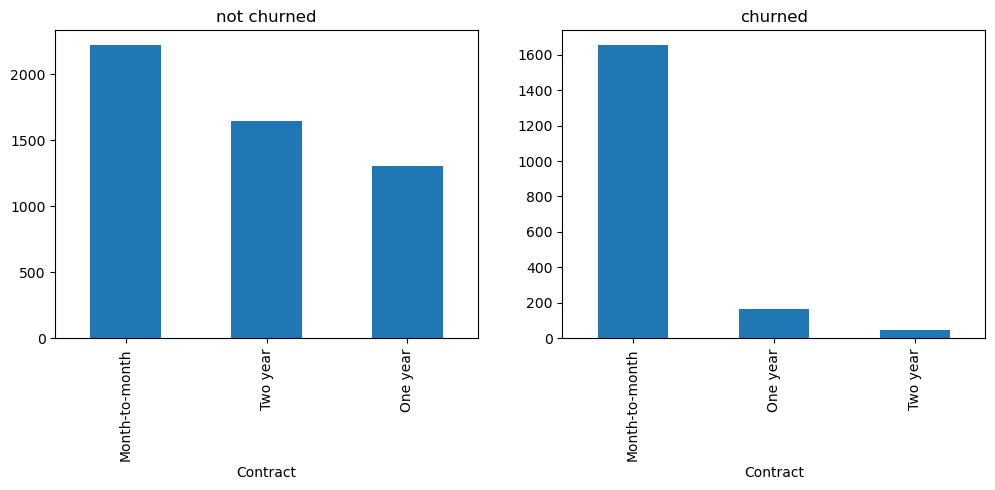

In [20]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

FOR MAIN TARGET VARIABLE

Text(0.5, 1.0, 'churned')

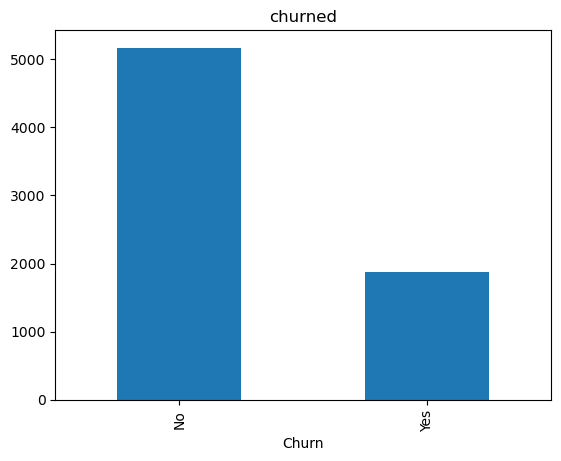

In [21]:
df[target].value_counts().plot(kind='bar').set_title('churned')

ONE HOT ENCODING

In [22]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [23]:
df1.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [24]:
df1.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

REARRANGING COLUMNS FOR BETTER UNDERSTANDING

In [25]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [26]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


HANDLING NULL VALUES

In [27]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

In [30]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

A.LOGISTIC REGRESSION


A.1 WITHOUT HYPERPARAMETER TUNING

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predict_train=logmodel.predict(X_train)
predict_test=logmodel.predict(X_test)

acc_train=accuracy_score(Y_train, predict_train)
acc_test=accuracy_score(Y_test, predict_test)
print('Train data Accuracy Prediction:',round(acc_train*100,2),'%')
print('Test data Accuracy Prediction:',round(acc_test*100,2),'%')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_test))
print("\nClassification Report:\n", classification_report(Y_test, predict_test))

Train data Accuracy Prediction: 80.65 %
Test data Accuracy Prediction: 80.03 %

Confusion Matrix:
 [[1397  160]
 [ 262  294]]

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.90      0.87      1557
        True       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



A.1.1 DRAWING SOME GRAPHS BASED ON CLASSIFICATION REPORT

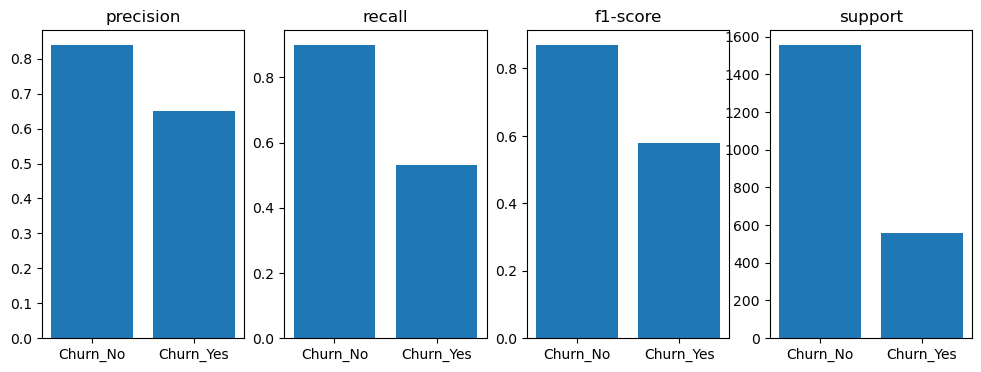

In [32]:
# calculate the classification report
predLR = logmodel.predict(X_test)
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])

# split the report into lines
lines = report.split('\n')

# split each line into parts
parts = [line.split() for line in lines[2:-5]]

# extract the metrics for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

# create a bar chart for each metric
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

# display the plot
plt.show()

A.1.2 CONFUSION MATRIX

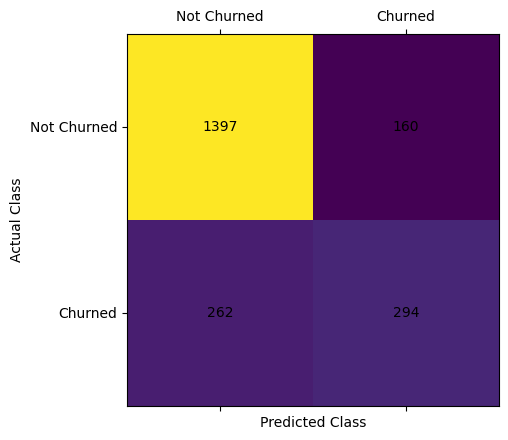

In [33]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)
plt.matshow(confusion_matrix(Y_test, predLR))

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

A.2 TUNING THE HYPERPARAMETER AND PLOTTING THE GRAPH

Fitting 5 folds for each of 56 candidates, totalling 280 fits
C = 0.001: Train Accuracy = 79.27%, Test Accuracy = 78.51%
C = 0.01: Train Accuracy = 80.51%, Test Accuracy = 80.50%
C = 0.1: Train Accuracy = 80.57%, Test Accuracy = 80.22%
C = 1: Train Accuracy = 80.65%, Test Accuracy = 80.03%
C = 10: Train Accuracy = 80.65%, Test Accuracy = 80.03%
C = 100: Train Accuracy = 80.59%, Test Accuracy = 80.03%
C = 1000: Train Accuracy = 80.57%, Test Accuracy = 80.03%

Best Model Accuracy after tuning:
Train data Accuracy Prediction: 80.59 %
Test data Accuracy Prediction: 80.03 %

Confusion Matrix:
 [[1400  157]
 [ 265  291]]

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.90      0.87      1557
        True       0.65      0.52      0.58       556

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



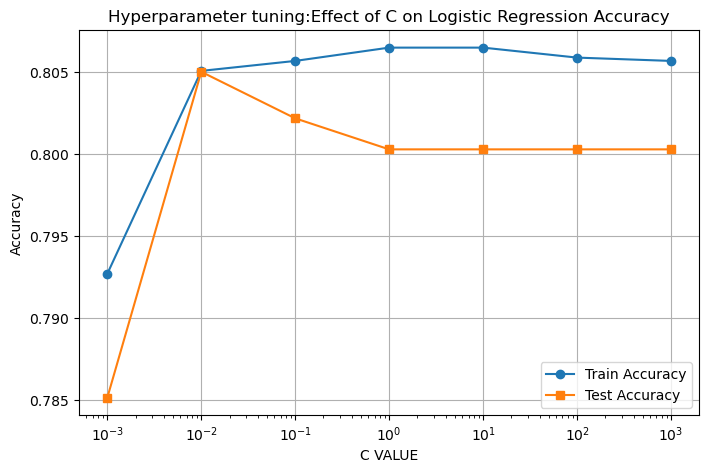

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the model
log_reg = LogisticRegression(max_iter=1000)

# Define the hyperparameter grid
param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear', 'saga'],
    },
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear', 'saga', 'lbfgs'],
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['saga'],
        'l1_ratio': [0.0, 0.5, 1.0]
    }
]

# Set up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit to training data
grid_search.fit(X_train, Y_train)

# Extract best model from GridSearchCV
best_model = grid_search.best_estimator_

# Define C values for plotting
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_accuracies = []
test_accuracies = []

# Loop over each C value to evaluate accuracy
for c in C_values:
    model = LogisticRegression(C=c, max_iter=1000, solver=best_model.solver, penalty=best_model.penalty, 
                               l1_ratio=best_model.l1_ratio if best_model.penalty == 'elasticnet' else None)
    model.fit(X_train, Y_train)
    
    train_acc = accuracy_score(Y_train, model.predict(X_train))
    test_acc = accuracy_score(Y_test, model.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # Print the accuracy values for each C
    print(f"C = {c}: Train Accuracy = {train_acc*100:.2f}%, Test Accuracy = {test_acc*100:.2f}%")
# Evaluate the best model on test data
predict_train2 = best_model.predict(X_train)
predict_test2 = best_model.predict(X_test)

acc_train2 = accuracy_score(Y_train, predict_train2)
acc_test2 = accuracy_score(Y_test, predict_test2)

print('\nBest Model Accuracy after tuning:')
print('Train data Accuracy Prediction:', round(acc_train2*100, 2), '%')
print('Test data Accuracy Prediction:', round(acc_test2*100, 2), '%')

# Confusion Matrix and Classification Report for the best model
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_test2))
print("\nClassification Report:\n", classification_report(Y_test, predict_test2))

# Plotting train and test accuracies for different C values
plt.figure(figsize=(8, 5))
plt.plot(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xscale('log')
plt.xlabel('C VALUE')
plt.ylabel('Accuracy')
plt.title('Hyperparameter tuning:Effect of C on Logistic Regression Accuracy')
plt.legend()
plt.grid(True)
plt.show()





B. SUPPORT VECTOR MACHINE (SVM)

B.1 WITHOUT HYPERPARAMETER TUNING

In [35]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

y_pred_svc = svc.predict(X_test)
print(classification_report(Y_test, y_pred_svc))
s=svc.score(X_train,Y_train)
print("svc score= ",s)
acc=accuracy_score(Y_test, y_pred_svc)
print("accuracy score=",acc)

              precision    recall  f1-score   support

       False       0.83      0.92      0.87      1557
        True       0.67      0.48      0.56       556

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113

svc score=  0.8170385395537525
accuracy score= 0.8012304779933743


B.1.1 BAR GRAPH FOR TRAIN VS TEST DATA

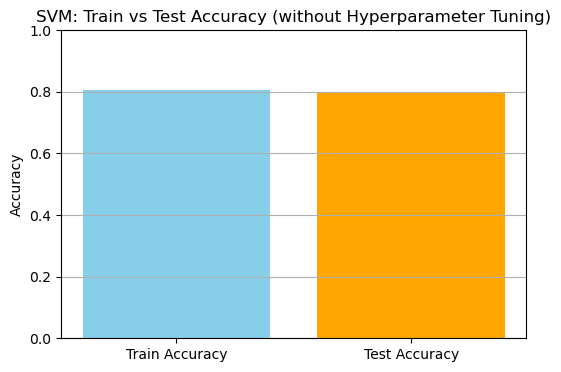

In [36]:
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [acc_train, acc_test], color=['skyblue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('SVM: Train vs Test Accuracy (without Hyperparameter Tuning)')
plt.grid(axis='y')
plt.show()

B.1.2 CONFUSION MATRIX

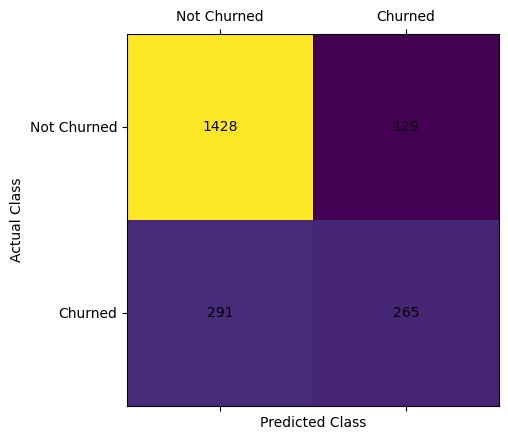

In [37]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_svc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

B.2 TUNING HYPERPARAMETER AND PLOTTING GRAPH

Accuracies for each C value:
C = 0.01: Train Accuracy = 73.37%, Test Accuracy = 73.69%
C = 0.1: Train Accuracy = 80.08%, Test Accuracy = 79.32%
C = 1: Train Accuracy = 81.70%, Test Accuracy = 80.12%
C = 10: Train Accuracy = 87.00%, Test Accuracy = 78.04%
C = 100: Train Accuracy = 93.41%, Test Accuracy = 72.98%
C = 1000: Train Accuracy = 95.44%, Test Accuracy = 70.94%


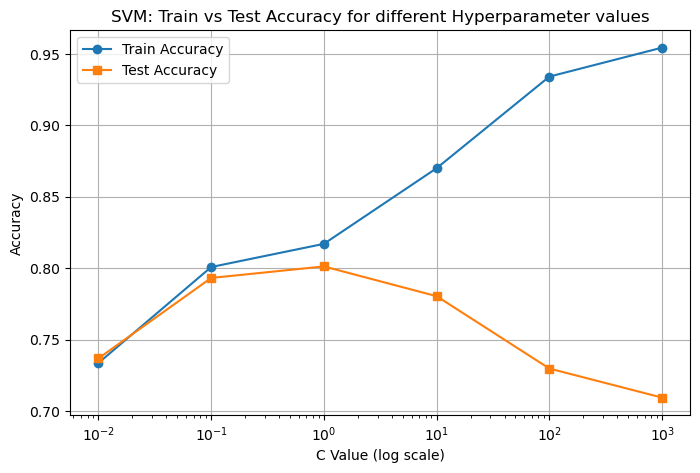

In [38]:
C_values = [0.01, 0.1, 1, 10, 100, 1000]
train_accuracies = []
test_accuracies = []

# Loop over each C value
print("Accuracies for each C value:")
for c in C_values:
    model = SVC(C=c)
    model.fit(X_train, Y_train)

    train_acc = accuracy_score(Y_train, model.predict(X_train))
    test_acc = accuracy_score(Y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"C = {c}: Train Accuracy = {train_acc*100:.2f}%, Test Accuracy = {test_acc*100:.2f}%")

# Plot Train vs Test Accuracies
plt.figure(figsize=(8, 5))
plt.plot(C_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(C_values, test_accuracies, marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C Value (log scale)')
plt.ylabel('Accuracy')
plt.title('SVM: Train vs Test Accuracy for different Hyperparameter values')
plt.legend()
plt.grid(True)
plt.show()

C. DECISION TREE

C.1 WITHOUT HYPERPARAMETER TUNING

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)
print(classification_report(Y_test, y_pred_dtc))


D=dtc.score(X_train,Y_train)
print("DTC score= ",D)
A=accuracy_score(Y_test, y_pred_dtc)
print("accuracy score= ",A)

              precision    recall  f1-score   support

       False       0.82      0.80      0.81      1557
        True       0.47      0.49      0.48       556

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.72      0.72      2113

DTC score=  0.9987829614604462
accuracy score=  0.722669190724089


C.1.1 BAR GRAPH FOR TRAIN VS TEST

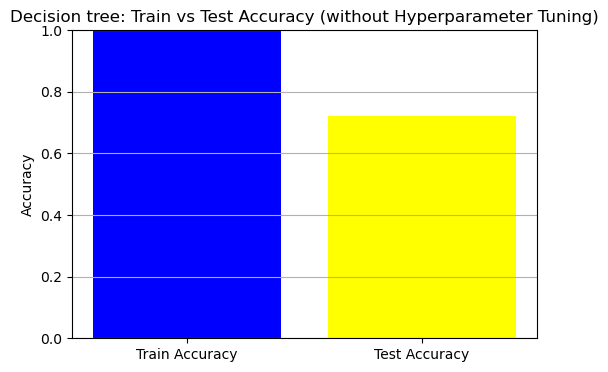

In [40]:
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [D,A], color=['blue', 'yellow'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Decision tree: Train vs Test Accuracy (without Hyperparameter Tuning)')
plt.grid(axis='y')
plt.show()

C.1.2 CONFUSION MATRIX

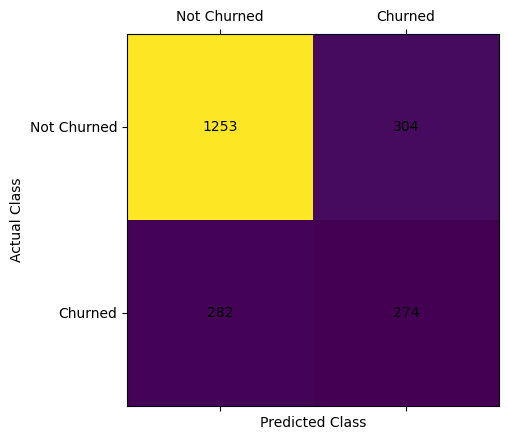

In [41]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

C.2 TUNING THE HYPERPARAMETER AND PLOTTING GRAPH

max_depth = 1: Train Accuracy = 0.734, Test Accuracy = 0.737
max_depth = 2: Train Accuracy = 0.790, Test Accuracy = 0.793
max_depth = 3: Train Accuracy = 0.790, Test Accuracy = 0.793
max_depth = 4: Train Accuracy = 0.794, Test Accuracy = 0.782
max_depth = 5: Train Accuracy = 0.804, Test Accuracy = 0.787
max_depth = 6: Train Accuracy = 0.812, Test Accuracy = 0.788
max_depth = 7: Train Accuracy = 0.822, Test Accuracy = 0.776
max_depth = 8: Train Accuracy = 0.837, Test Accuracy = 0.775
max_depth = 9: Train Accuracy = 0.850, Test Accuracy = 0.773
max_depth = 10: Train Accuracy = 0.863, Test Accuracy = 0.768
max_depth = 11: Train Accuracy = 0.875, Test Accuracy = 0.760
max_depth = 12: Train Accuracy = 0.884, Test Accuracy = 0.760
max_depth = 13: Train Accuracy = 0.893, Test Accuracy = 0.753
max_depth = 14: Train Accuracy = 0.902, Test Accuracy = 0.745
max_depth = 15: Train Accuracy = 0.908, Test Accuracy = 0.749
max_depth = 16: Train Accuracy = 0.912, Test Accuracy = 0.748
max_depth = 17: T

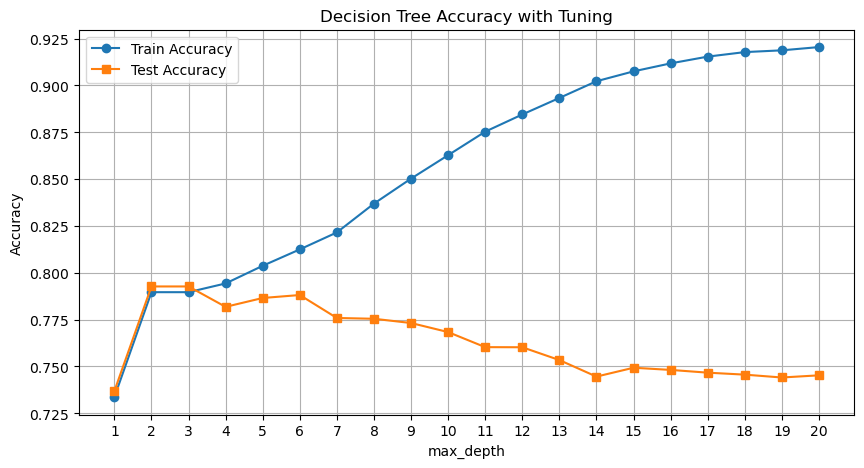

In [42]:
from sklearn.model_selection import cross_val_score

# Range of depths to test
depths = range(1, 21)  # Test deeper trees too, just to see the trend
train_accuracies = []
test_accuracies = []

# Define the list of values for min_samples_split and min_samples_leaf
min_samples_splits = [2, 5, 10]
min_samples_leaves = [1, 2, 5]

# Loop through different depths
for depth in depths:
    # Variables to accumulate the train and test accuracies for this depth
    avg_train_acc = 0
    avg_test_acc = 0
    count = 0  # To count the number of iterations for averaging

    # Loop through combinations of min_samples_split and min_samples_leaf
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            dtc = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples_split, 
                                         min_samples_leaf=min_samples_leaf, random_state=42)

            # Fit the model
            dtc.fit(X_train, Y_train)

            # Calculate the accuracies
            train_acc = dtc.score(X_train, Y_train)
            test_acc = accuracy_score(Y_test, dtc.predict(X_test))

            # Accumulate the accuracies
            avg_train_acc += train_acc
            avg_test_acc += test_acc
            count += 1

    # Average the results for this depth
    avg_train_acc /= count
    avg_test_acc /= count

    # Append the average accuracies for this depth to the list
    train_accuracies.append(avg_train_acc)
    test_accuracies.append(avg_test_acc)

    # Print the accuracies for the current depth
    print(f"max_depth = {depth}: Train Accuracy = {avg_train_acc:.3f}, Test Accuracy = {avg_test_acc:.3f}")

# Plot line graph
plt.figure(figsize=(10, 5))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy with Tuning')
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()



D. K NEAREST NEIGHBOUR (KNN)

D.1 WITHOUT HYPERPARAMETER TUNING

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)
pred_knn = knn.predict(X_test)


In [44]:
print(classification_report(Y_test,pred_knn))
k=knn.score(X_train,Y_train)
print("knn score=",k)
a=accuracy_score(Y_test, pred_knn)
print("accuracy score=",a)

              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1557
        True       0.62      0.55      0.58       556

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113

knn score= 0.804868154158215
accuracy score= 0.792238523426408


D.1.1 PLOTTING BAR GRAPH FOR TRAIN VS TEST

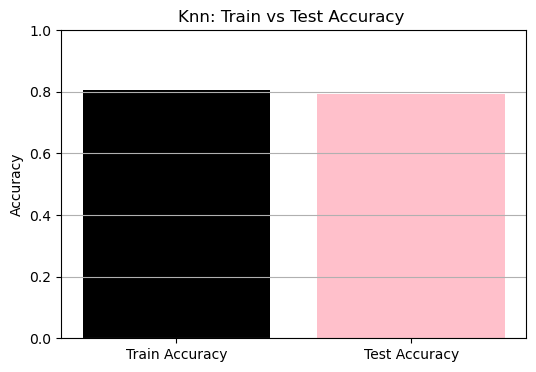

In [45]:
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [k,a], color=['black', 'pink'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Knn: Train vs Test Accuracy ')
plt.grid(axis='y')
plt.show()

D.1.2 CONFUSION MATRIX

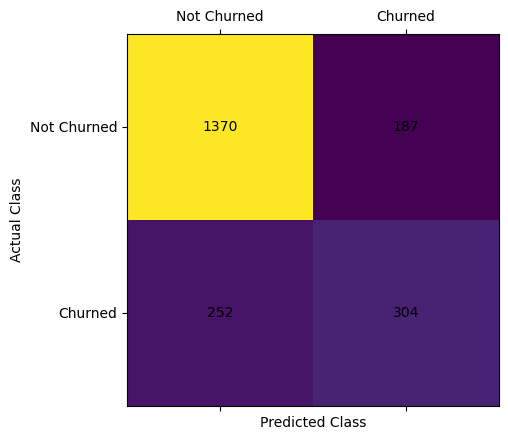

In [46]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

D.2 HYPERPARAMETER TUNING AND PLOTTING GRAPH

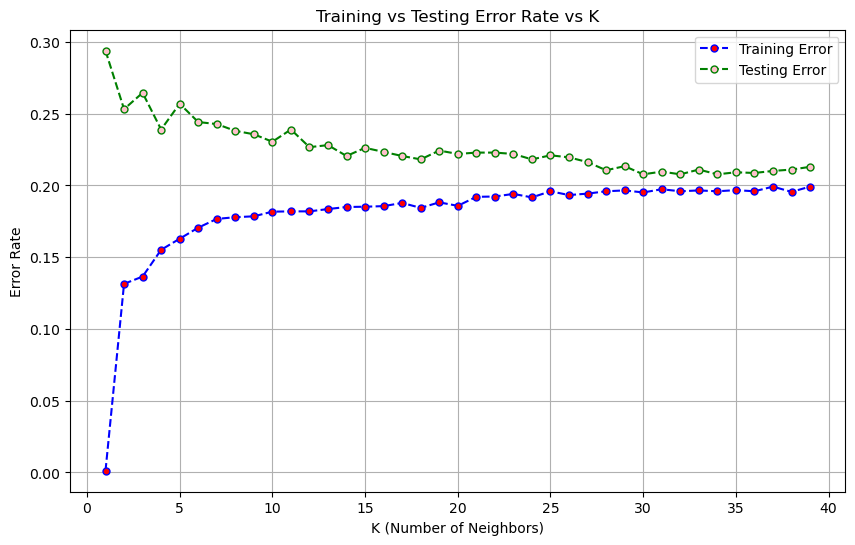

In [47]:
# Lists to store error rates for both training and testing data
train_error_rate = []
test_error_rate = []

# Loop through different K values (1 to 39)
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    
    # Training and testing predictions
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    
    # Append error rates to respective lists
    train_error_rate.append(np.mean(pred_train != Y_train))
    test_error_rate.append(np.mean(pred_test != Y_test))

# Plotting the error rates for both training and testing data
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), train_error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=5, label='Training Error')
plt.plot(range(1, 40), test_error_rate, color='green', linestyle='--', marker='o', markerfacecolor='pink', markersize=5, label='Testing Error')

# Adding title and labels
plt.title('Training vs Testing Error Rate vs K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Error Rate')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


E. RANDOM FOREST CLASSIFIER

E.1 WITHOUT HYPERPARAMETER TUNING

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

pred_rf = rf.predict(X_test)




In [49]:
# Print the classification report
print(classification_report(Y_test, pred_rf))

# Get the model's accuracy score on the training data
train_score = rf.score(X_train, Y_train)
print("Random Forest Train Score:", train_score)

# Calculate and print the accuracy on the test data
test_accuracy = accuracy_score(Y_test, pred_rf)
print("Random Forest Test Accuracy:", test_accuracy)

              precision    recall  f1-score   support

       False       0.82      0.90      0.86      1557
        True       0.62      0.46      0.53       556

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113

Random Forest Train Score: 0.9987829614604462
Random Forest Test Accuracy: 0.7841930903928065


E.1.1 BAR GRAPH FOR TRAIN VS TEST

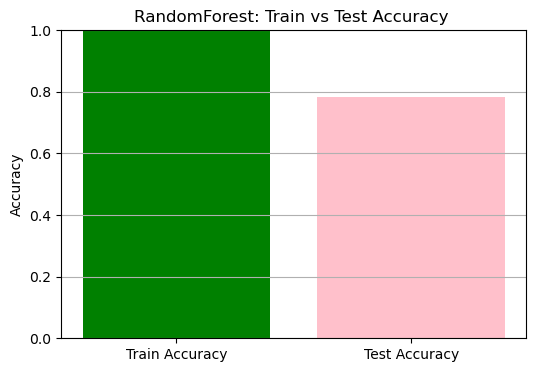

In [50]:
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_score,test_accuracy], color=['green', 'pink'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('RandomForest: Train vs Test Accuracy ')
plt.grid(axis='y')
plt.show()

E.1.2 CONFUSION MATRIX

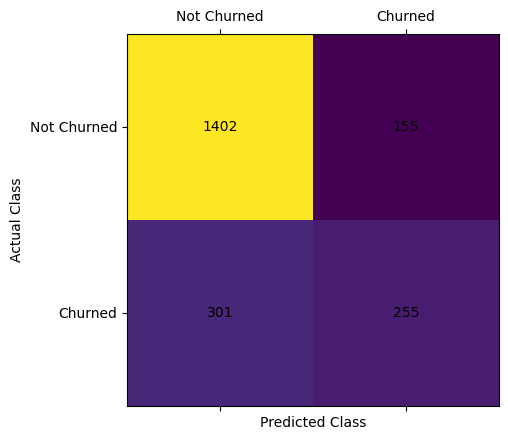

In [51]:
confusion_matrix_rf = confusion_matrix(Y_test,pred_rf)
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_rf)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_rf[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

E.2 HYPERPAMETER TUNING AND PLOTTING GRAPH

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

Final Train Accuracy: 0.8308
Final Test Accuracy: 0.8036
max_depth = 2: Train Accuracy = 0.7611, Test Accuracy = 0.7563
max_depth = 3: Train Accuracy = 0.7897, Test Accuracy = 0.7823
max_depth = 4: Train Accuracy = 0.7976, Test Accuracy = 0.7870
max_depth = 5: Train Accuracy = 0.8041, Test Accuracy = 0.7922
max_depth = 6: Train Accuracy = 0.8118, Test Accuracy = 0.7903
max_depth = 7: Train Accuracy = 0.8178, Test Accuracy = 0.7937
max_depth = 8: Train Accuracy = 0.8247, Test Accuracy = 0.7998
max_depth = 9: Train Accuracy = 0.8290, Test Accuracy = 0.8012
max_depth = 10: Train Accuracy = 0.8308, Test Accuracy = 0.8036


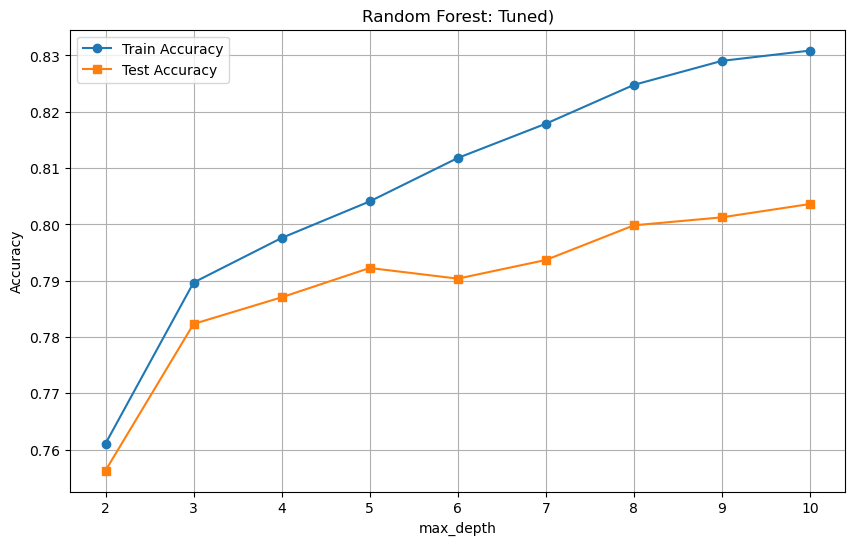

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution with more regularization
param_dist = {
    'max_depth': range(2, 11),  # Limit depth to 10 for stronger regularization
    'min_samples_split': [5, 10, 20],  # Higher min samples split
    'min_samples_leaf': [2, 5, 10],  # Higher min samples leaf
    'max_features': ['sqrt', 'log2'],  # Limit features per split
    'n_estimators': [100, 200],  # Use fewer trees to reduce complexity
    'bootstrap': [True]  # Ensure bootstrap sampling is enabled
}

# Initialize Random Forest Classifier
rf2 = RandomForestClassifier(random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)

# Fit randomized search
random_search.fit(X_train, Y_train)

# Best hyperparameters
best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the model with the best parameters
rf_best = random_search.best_estimator_

# Accuracy on training set
train_acc = accuracy_score(Y_train, rf_best.predict(X_train))

# Accuracy on test set
test_acc = accuracy_score(Y_test, rf_best.predict(X_test))

# Print the final accuracies for the best model
print(f"\nFinal Train Accuracy: {train_acc:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

# Plot the accuracies for different depths
depths = range(2, 11)  # Reduce range of depths to prevent overfitting
train_accuracies = []
test_accuracies = []

# Evaluate performance at each max_depth for the best model
for d in depths:
    rf_best.set_params(max_depth=d)
    rf_best.fit(X_train, Y_train)

    train_acc = accuracy_score(Y_train, rf_best.predict(X_train))
    test_acc = accuracy_score(Y_test, rf_best.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # Print the accuracy at each step
    print(f"max_depth = {d}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='s')
plt.title("Random Forest: Tuned)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


FINDING AND PLOTTING COMBINED ACCURACIES FOR TRAIN AND TEST DATA IN ALL 5 CLASSIFIERS APPLIED

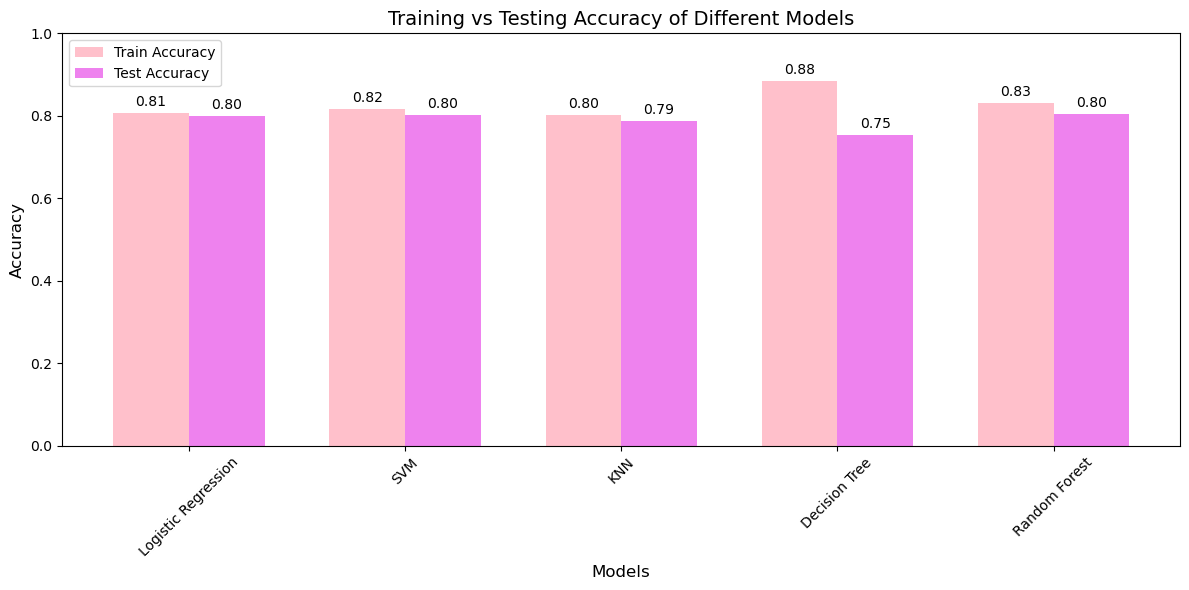

In [53]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Store all your models and their names in a list
models = [
    ('Logistic Regression', logmodel),
    ('SVM', svc),
    ('KNN', knn),
    ('Decision Tree', dtc),
    ('Random Forest', rf_best)
]

# Dictionaries to hold training and testing accuracy scores
train_accuracies = {}
test_accuracies = {}

for name, model in models:
    model.fit(X_train, Y_train)  # Fit the model before predicting
    
    # Predictions
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Get accuracy scores
    train_acc = accuracy_score(Y_train, pred_train)
    test_acc = accuracy_score(Y_test, pred_test)
    
    # Store accuracies
    train_accuracies[name] = train_acc
    test_accuracies[name] = test_acc

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

# Create double bar chart for training and testing accuracies
bar_width = 0.35
index = range(len(models))

plt.figure(figsize=(12, 6))

# Bar for training accuracies
bars_train = plt.bar(index, train_accuracies.values(), bar_width, label='Train Accuracy', color='pink')

# Bar for testing accuracies (shifted by bar width)
bars_test = plt.bar([i + bar_width for i in index], test_accuracies.values(), bar_width, label='Test Accuracy', color='violet')

# Add values on top of bars
add_labels(bars_train)
add_labels(bars_test)

# Set title and labels
plt.title("Training vs Testing Accuracy of Different Models", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Set x-axis ticks in the middle of bars
plt.xticks([i + bar_width / 2 for i in index], train_accuracies.keys(), rotation=45)

# Set y-axis range from 0 to 1
plt.ylim(0, 1)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


USING ALL 5 MODELS, MAKING A USER INPUT DRIVEN CODE

In [107]:
# Assuming these models are already trained and evaluated
models = {
    'Logistic Regression': logmodel,
    'SVM': svc,
    'KNN': knn,
    'Decision Tree': dtc,
    'Random Forest': rf
}

# Accuracy scores for each model
model_accuracies = {
    'Logistic Regression': 0.81,
    'SVM': 0.80,
    'KNN': 0.79,
    'Decision Tree': 0.77,
    'Random Forest': 0.83
}

# Required columns from training (after get_dummies on df)
trained_columns = [
    'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
    'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
    'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
    'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No internet service', 'DeviceProtection_Yes',
    'TechSupport_No internet service', 'TechSupport_Yes',
    'StreamingTV_No internet service', 'StreamingTV_Yes',
    'StreamingMovies_No internet service', 'StreamingMovies_Yes',
    'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

# Function to encode categorical variables
def encode_input(data):
    data = pd.get_dummies(data, columns=['gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)
    return data

# Function to predict churn
def predict_churn(input_data):
    input_data = input_data.drop('Churn', axis=1, errors='ignore')
    input_data = encode_input(input_data)
    input_data = input_data.reindex(columns=trained_columns, fill_value=0)
    scaled_input = scaler.transform(input_data)

    best_model = None
    best_prediction = None
    best_accuracy = 0.0

    for name, model in models.items():
        try:
            pred = model.predict(scaled_input)
            best_prediction = pred[0]
            best_model = name
            best_accuracy = model_accuracies.get(name, 0.0)
        except ValueError as e:
            continue

    return best_prediction, best_model, best_accuracy


# ------------------ USER INPUT SECTION ------------------

print("Enter the customer details:")

gender = input("Gender (Male/Female): ")
senior_citizen = int(input("SeniorCitizen (0/1): "))
partner = input("Partner (Yes/No): ")
dependents = input("Dependents (Yes/No): ")
tenure = int(input("Tenure (number of months): "))
phone_service = input("PhoneService (Yes/No): ")
multiple_lines = input("MultipleLines (Yes/No/No phone service): ")
internet_service = input("InternetService (Fiber optic/DSL/No): ")
online_security = input("OnlineSecurity (Yes/No/No internet service): ")
online_backup = input("OnlineBackup (Yes/No/No internet service): ")
device_protection = input("DeviceProtection (Yes/No/No internet service): ")
tech_support = input("TechSupport (Yes/No/No internet service): ")
streaming_tv = input("StreamingTV (Yes/No/No internet service): ")
streaming_movies = input("StreamingMovies (Yes/No/No internet service): ")
contract = input("Contract (One year/Two year/Month-to-month): ")
paperless_billing = input("PaperlessBilling (Yes/No): ")
payment_method = input("PaymentMethod (Credit card (automatic)/Electronic check/Mailed check/Bank transfer (automatic)): ")
monthly_charges = float(input("MonthlyCharges: "))
total_charges = float(input("TotalCharges: "))

input_data = pd.DataFrame({
    'gender': [gender],
    'SeniorCitizen': [senior_citizen],
    'Partner': [partner],
    'Dependents': [dependents],
    'tenure': [tenure],
    'PhoneService': [phone_service],
    'MultipleLines': [multiple_lines],
    'InternetService': [internet_service],
    'OnlineSecurity': [online_security],
    'OnlineBackup': [online_backup],
    'DeviceProtection': [device_protection],
    'TechSupport': [tech_support],
    'StreamingTV': [streaming_tv],
    'StreamingMovies': [streaming_movies],
    'Contract': [contract],
    'PaperlessBilling': [paperless_billing],
    'PaymentMethod': [payment_method],
    'MonthlyCharges': [monthly_charges],
    'TotalCharges': [total_charges],
    'Churn': [1]
})

# Predict churn
churn, model_used, accuracy = predict_churn(input_data)
print(f"\nPrediction: {'Churned' if churn == 1 else 'Not Churned'}")
print(f"Model Used: {model_used}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Enter the customer details:

Prediction: Not Churned
Model Used: Decision Tree
Model Accuracy: 77.00%
